In [5]:
import rasterio
import numpy as np
import os
import sys
import xarray as xr

In [4]:
file_path = "koppen_geiger_0p1.tif"
with rasterio.open(file_path) as dataset:
    # Print metadata
    print("Metadata:")
    print(dataset.meta)

    # Get dimensions (width, height)
    print(f"Dimensions: {dataset.width} x {dataset.height}")

    # Get number of bands
    print(f"Number of bands: {dataset.count}")

    # Print CRS (Coordinate Reference System)
    print(f"CRS: {dataset.crs}")

    # Read the first band
    band1 = dataset.read(1)
    print(f"Band 1 shape: {band1.shape}")

Metadata:
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 3600, 'height': 1800, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.1, 0.0, -180.0,
       0.0, -0.1, 90.0)}
Dimensions: 3600 x 1800
Number of bands: 1
CRS: EPSG:4326
Band 1 shape: (1800, 3600)


In [8]:
# Get unique values
unique_values = np.unique(band1)
print(f"Unique values: {unique_values}")

Unique values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]


In [22]:
with rasterio.open(file_path) as dataset:
    # Read the data from the first band
    band1 = dataset.read(1)
    
    # Get geospatial information (coordinate reference system, transform)
    transform = dataset.transform
    crs = dataset.crs

    # Get coordinates (convert from affine transform)
    nrows, ncols = band1.shape
    x = np.arange(ncols) * transform[0] + transform[2]
    y = np.arange(nrows) * transform[4] + transform[5]

    # Create an xarray DataArray
    data_array = xr.DataArray(
        band1,
        coords=[("lat", y), ("lon", x)],
        dims=["lat", "lon"],
        attrs={
            "crs": crs.to_string(),
            "transform": transform,
            "description": "Koppen-Geiger climate classification",
        },
    )

    # Convert to xarray dataset
    dataset_xr = xr.Dataset({"climate_code": data_array})

In [23]:
dataset_xr

<xarray.Dataset> Size: 7MB
Dimensions:       (lat: 1800, lon: 3600)
Coordinates:
  * lat           (lat) float64 14kB 90.0 89.9 89.8 89.7 ... -89.7 -89.8 -89.9
  * lon           (lon) float64 29kB -180.0 -179.9 -179.8 ... 179.7 179.8 179.9
Data variables:
    climate_code  (lat, lon) uint8 6MB 0 0 0 0 0 0 0 0 ... 30 30 30 30 30 30 30

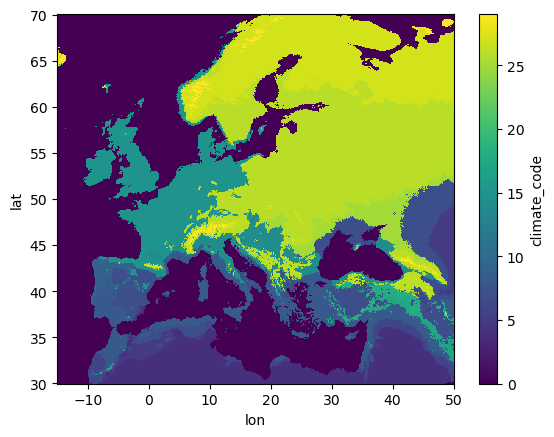

In [25]:
dataset_xr.sel(lat=slice(70, 30), lon=slice(-15, 50)).climate_code.plot()

In [26]:
dataset_SEEDS_region = dataset_xr.sel(lat=slice(70, 30), lon=slice(-15, 50))

In [27]:
dataset_SEEDS_region.to_netcdf("koppen_geiger_0p1_SEEDS_region.nc")